In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

In [2]:
test_df = pd.read_csv('test.csv')
df = pd.read_csv('train.csv')

### Анализ и обработка данных

In [3]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,id
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0,34302
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0,33247
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0,31886
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra City Council,-37.79690,144.99690,Northern Metropolitan,4019.0,18999
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.80720,144.99410,Northern Metropolitan,4019.0,16809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18368,Noble Park,5 Blaby St,3,h,627500.0,PI,C21,30/09/2017,22.7,3174.0,3.0,1.0,6.0,569.0,130.0,1959.0,Greater Dandenong City Council,-37.96900,145.18226,South-Eastern Metropolitan,11806.0,8052
18369,Reservoir,18 Elinda Pl,3,u,475000.0,SP,RW,30/09/2017,12.0,3073.0,3.0,1.0,1.0,NaN,105.0,1990.0,Darebin City Council,-37.69769,145.02332,Northern Metropolitan,21650.0,22511
18370,Roxburgh Park,14 Stainsby Cr,4,h,591000.0,S,Raine,30/09/2017,20.6,3064.0,4.0,2.0,2.0,NaN,225.0,1995.0,Hume City Council,-37.63665,144.92976,Northern Metropolitan,5833.0,31811
18371,Springvale South,30 Waddington Cr,3,h,780500.0,S,Harcourts,30/09/2017,22.2,3172.0,3.0,2.0,1.0,544.0,NaN,NaN,Greater Dandenong City Council,-37.97751,145.14813,South-Eastern Metropolitan,4054.0,6855


In [4]:
# Посмотрим на пропуски в данных

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18373 entries, 0 to 18372
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         18373 non-null  object 
 1   Address        18373 non-null  object 
 2   Rooms          18373 non-null  int64  
 3   Type           18373 non-null  object 
 4   Price          18373 non-null  float64
 5   Method         18373 non-null  object 
 6   SellerG        18373 non-null  object 
 7   Date           18373 non-null  object 
 8   Distance       18373 non-null  float64
 9   Postcode       18373 non-null  float64
 10  Bedroom2       14905 non-null  float64
 11  Bathroom       14903 non-null  float64
 12  Car            14798 non-null  float64
 13  Landsize       13579 non-null  float64
 14  BuildingArea   7750 non-null   float64
 15  YearBuilt      8944 non-null   float64
 16  CouncilArea    18372 non-null  object 
 17  Lattitude      15041 non-null  float64
 18  Longti

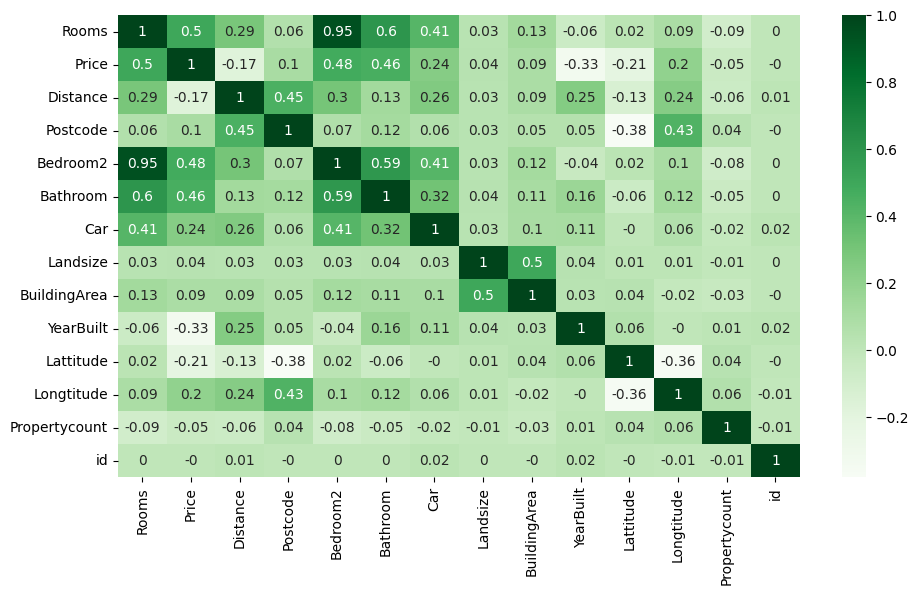

In [5]:
# Посмотрим на корреляцию в данных

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(11, 6))
sns.heatmap(round(df.corr(), 2), cmap="Greens", annot=True)
plt.show()

Корреляция с помощью phik считается больше 15 минут, поэтому вставляю картинку

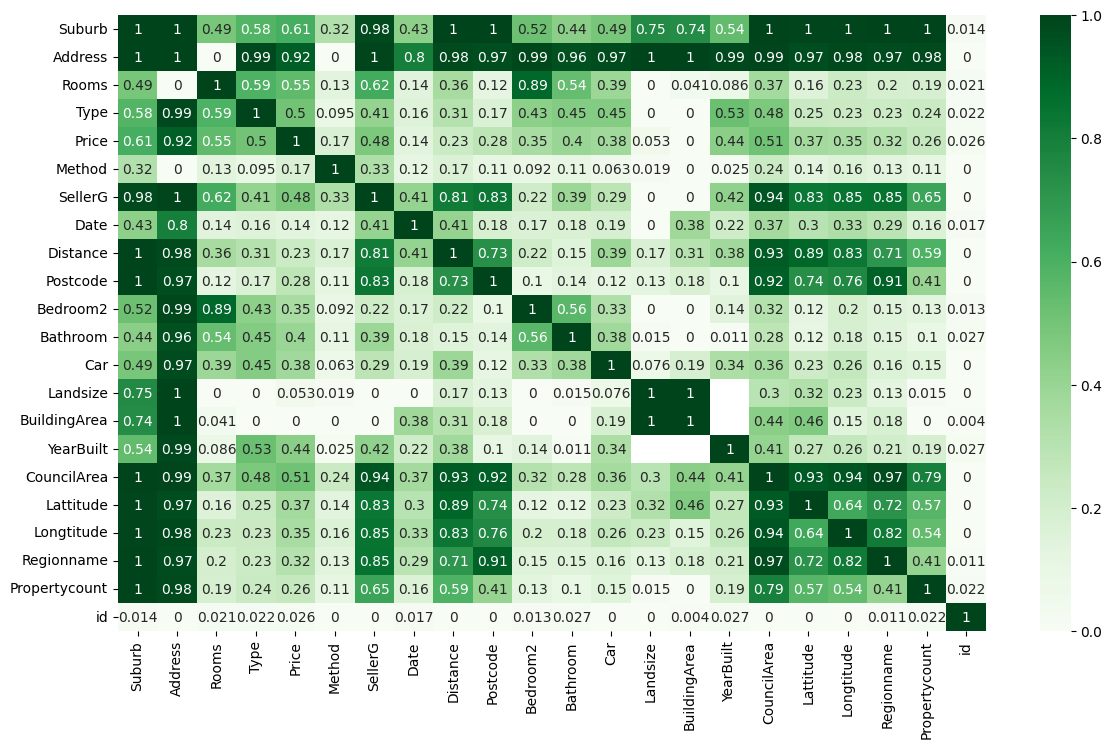

Колонку Bedroom2 (количество спален) также можно удалить, т.к. корреляция с колонкой Rooms (количество комнат) составляет 95% + у этой колонки много пропусков.

Колонка BuildingArea (площадь самого объекта) не скоррелирована с ценой, что странно, т.к. обычно площадь напрямую влияет на стоимость. Видимо, это площадь всего здания или вроде того. Из-за большого количества пропусков (около 58%) и отсутствия корреляции с ценой удаляем эту колонку. Также эта колонка имеет корреляцию 1 с колонкой Landsize (площадь прилегающей территории).

Колонку Address (адрес) удаляем по причине её сильной корреляции с другими колонками.

In [6]:
df.drop(['Bedroom2', 'BuildingArea', 'Address'], axis=1, inplace=True)

В нескольких колонках есть всего один пропуск, посмотрим, не одна ли это строка, такое иногда встречается из-за ошибок при обработке.

In [7]:
df[df['CouncilArea'].isna()]

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,id
14406,Footscray,2,u,710000.0,S,Jas,15/07/2017,5.1,3011.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21235


Да, это одна строка с половиной пропущенных данных, проще всего удалить её.

In [8]:
df.drop(index=14406, inplace=True)

Далее нужно подумать, чем заполнить пропуски в остальных колонках.

In [9]:
# Посмотрим на медианы годов постройки для каждого района

df.groupby(['Suburb'])['YearBuilt'].agg('median')

Suburb
Abbotsford      1945.0
Aberfeldie      1980.0
Airport West    1982.5
Albanvale       1980.0
Albert Park     1900.0
                 ...  
Wyndham Vale    2005.0
Yallambie       1978.0
Yarra Glen      1975.0
Yarraville      1950.0
croydon            NaN
Name: YearBuilt, Length: 329, dtype: float64

В колонке YearBuilt (год постройки) пропуски заполним медианой отдельно по каждому району, т.к. года постройки сильно отличаются в зависимости от района.

Там, где медиана не посчиталась, пропуски заполняем медианой по всем районам.

In [10]:
for sub in df['Suburb'].unique():
    df['YearBuilt'][df.Suburb == sub] = df['YearBuilt'][df.Suburb == sub].fillna(df.groupby(['Suburb'])['YearBuilt'].agg('median')[sub])

df['YearBuilt'].fillna(df['YearBuilt'].median(), inplace=True)

В колонке Bathroom (количество ванных комнат) пропуски заполним медианой в зависимости от цены, это кажется хорошей идеей, т.к. чем больше цена, тем обычно больше площадь и больше количество ванных комнат. По крайней мере, это лучше, чем заполнять медианой по всему датафрейму.

Там, где медиана не посчиталась, пропуски заполняем предыдущим значением, предварительно отсортировав датафрейм по цене.

In [11]:
for price in df['Price'].unique():
    df['Bathroom'][df.Price == price] = df['Bathroom'][df.Price == price].fillna(df.groupby(['Price'])['Bathroom'].agg('median')[price])

df = df.sort_values('Price')
df['Bathroom'] = df['Bathroom'].fillna(method='ffill')

В колонках Car (количество парковочных мест) и Landsize (площадь прилегающей территории) сделаем такое же заполнение пропусков по цене.

In [12]:
for price in df['Price'].unique():
    df['Car'][df.Price == price] = df['Car'][df.Price == price].fillna(df.groupby(['Price'])['Car'].agg('median')[price])

df['Car'] = df['Car'].fillna(method='ffill')

In [13]:
for price in df['Price'].unique():
    df['Landsize'][df.Price == price] = df['Landsize'][df.Price == price].fillna(df.groupby(['Price'])['Landsize'].agg('median')[price])

df['Landsize'] = df['Landsize'].fillna(method='ffill')

Широту и долготу заполним средним значением по району. Там, где среднее не посчиталось, заполняем средним по всем районам.

In [14]:
for sub in df['Suburb'].unique():
    df['Lattitude'][df.Suburb == sub] = df['Lattitude'][df.Suburb == sub].fillna(df.groupby(['Suburb'])['Lattitude'].agg('mean')[sub])

for sub in df['Suburb'].unique():
    df['Longtitude'][df.Suburb == sub] = df['Longtitude'][df.Suburb == sub].fillna(df.groupby(['Suburb'])['Longtitude'].agg('mean')[sub])

df['Lattitude'].fillna(df['Lattitude'].mean(), inplace=True)
df['Longtitude'].fillna(df['Longtitude'].mean(), inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18372 entries, 3376 to 16546
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         18372 non-null  object 
 1   Rooms          18372 non-null  int64  
 2   Type           18372 non-null  object 
 3   Price          18372 non-null  float64
 4   Method         18372 non-null  object 
 5   SellerG        18372 non-null  object 
 6   Date           18372 non-null  object 
 7   Distance       18372 non-null  float64
 8   Postcode       18372 non-null  float64
 9   Bathroom       18372 non-null  float64
 10  Car            18372 non-null  float64
 11  Landsize       18372 non-null  float64
 12  YearBuilt      18372 non-null  float64
 13  CouncilArea    18372 non-null  object 
 14  Lattitude      18372 non-null  float64
 15  Longtitude     18372 non-null  float64
 16  Regionname     18372 non-null  object 
 17  Propertycount  18372 non-null  float64
 18  id 

Теперь в данных нет пропусков, приступаем к дальнейшей обработке

In [16]:
df.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,id
3376,Footscray,1,u,227000.0,S,Sweeney,4/03/2017,6.4,3011.0,1.0,1.0,0.0,1970.0,Maribyrnong City Council,-37.790700,144.892400,Western Metropolitan,7570.0,5064
7798,Sunshine West,2,u,230000.0,PI,Barry,28/08/2016,13.5,3020.0,1.0,1.0,1996.0,1970.0,Brimbank City Council,-37.792317,144.809234,Western Metropolitan,6763.0,14910
3705,Glenroy,2,u,230000.0,PI,Raine,18/03/2017,13.0,3046.0,1.0,1.0,1996.0,1969.0,Moreland City Council,-37.702000,144.915400,Northern Metropolitan,8870.0,12323
12146,Footscray,1,u,240000.0,SA,Trimson,17/06/2017,5.1,3011.0,1.0,1.0,1015.0,1970.0,Maribyrnong City Council,-37.787780,144.890370,Western Metropolitan,7570.0,24175
15965,Footscray,2,u,240000.0,PI,Burnham,9/09/2017,5.1,3011.0,1.0,1.0,0.0,1965.0,Maribyrnong City Council,-37.788130,144.892910,Western Metropolitan,7570.0,9808


In [17]:
# Выделяем из даты месяц продажи. Кажется, что сезон продажи может влиять на стоимость.

df['month'] = pd.to_datetime(df['Date']).apply(lambda x: x.month)
df.drop(['Date'], axis=1, inplace=True)

In [18]:
# Посмотрим на количество уникальных значений в категориальных колонках, чтобы понять, как их кодировать

for col in ['SellerG', 'Suburb', 'CouncilArea', 'Regionname', 'Type', 'Method']:
    print(f'{col}: {df[col].nunique()}')

SellerG: 305
Suburb: 329
CouncilArea: 33
Regionname: 8
Type: 3
Method: 5


In [19]:
# Применяем Label Encoder для колонок с количеством уникальных значений больше 10

from sklearn.preprocessing import LabelEncoder

for col in ['SellerG', 'Suburb', 'CouncilArea']:
    df[col] = LabelEncoder().fit_transform(df[col])
    test_df[col] = LabelEncoder().fit_transform(test_df[col])

In [20]:
# Для остальных колонок сравним значения в тренировочных и тестовых данных, они должны совпадать, иначе возникнет ошибка

df.Regionname.unique(), test_df.Regionname.unique()

(array(['Western Metropolitan', 'Northern Metropolitan',
        'Southern Metropolitan', 'South-Eastern Metropolitan',
        'Western Victoria', 'Eastern Metropolitan', 'Northern Victoria',
        'Eastern Victoria'], dtype=object),
 array(['Northern Metropolitan', 'Western Metropolitan',
        'Western Victoria', 'Southern Metropolitan',
        'Eastern Metropolitan', 'Eastern Victoria',
        'South-Eastern Metropolitan', 'Northern Victoria', nan],
       dtype=object))

In [21]:
df.Type.unique(), test_df.Type.unique()

(array(['u', 'h', 't'], dtype=object), array(['u', 'h', 't'], dtype=object))

In [22]:
df.Method.unique(), test_df.Method.unique()

(array(['S', 'PI', 'SA', 'SP', 'VB'], dtype=object),
 array(['S', 'PI', 'SP', 'VB', 'SA'], dtype=object))

Наименования в тренировочных и тестовых данных совпадают, поэтому можно применить для этих колонок One Hot Encoder

In [23]:
for col in ['Regionname', 'Type', 'Method']:
    one_hot = pd.get_dummies(df[col], prefix=col, drop_first=True)
    df = pd.concat((df.drop(col, axis=1), one_hot), axis=1)

    one_hot = pd.get_dummies(test_df[col], prefix=col, drop_first=True)
    test_df = pd.concat((test_df.drop(col, axis=1), one_hot), axis=1)

In [24]:
# Делаем колонку с id объекта индексом

df = df.set_index('id')

In [25]:
# Посмотрим на итоговый датафрейм

df

,Suburb,Rooms,Price,SellerG,Distance,Postcode,Bathroom,Car,Landsize,YearBuilt,CouncilArea,Lattitude,Longtitude,Propertycount,month,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,Type_t,Type_u,Method_S,Method_SA,Method_SP,Method_VB
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5064,130,1,227000.0,254,6.4,3011.0,1.0,1.0,0.0,1970.0,16,-37.790700,144.892400,7570.0,4,0,0,0,0,0,1,0,0,1,1,0,0,0
14910,283,2,230000.0,21,13.5,3020.0,1.0,1.0,1996.0,1970.0,3,-37.792317,144.809234,6763.0,8,0,0,0,0,0,1,0,0,1,0,0,0,0
12323,141,2,230000.0,222,13.0,3046.0,1.0,1.0,1996.0,1969.0,24,-37.702000,144.915400,8870.0,3,0,1,0,0,0,0,0,0,1,0,0,0,0
24175,130,1,240000.0,263,5.1,3011.0,1.0,1.0,1015.0,1970.0,16,-37.787780,144.890370,7570.0,6,0,0,0,0,0,1,0,0,1,0,1,0,0
9808,130,2,240000.0,40,5.1,3011.0,1.0,1.0,0.0,1965.0,16,-37.788130,144.892910,7570.0,9,0,0,0,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8128,295,4,5500000.0,157,4.6,3142.0,4.0,5.0,877.0,1923.0,27,-37.844700,145.013400,7217.0,4,0,0,0,0,1,0,0,0,0,1,0,0,0
22539,295,4,5500000.0,157,4.6,3142.0,3.0,2.0,691.0,2000.0,27,-37.843100,145.021000,7217.0,3,0,0,0,0,1,0,0,0,0,0,0,0,1
34841,150,5,5510000.0,220,5.3,3122.0,2.0,5.0,820.0,1971.0,2,-37.830310,145.029730,11308.0,3,0,0,0,0,1,0,0,0,0,1,0,0,0


### Разбиение данных и обучение моделей

In [26]:
# Разбиваем данные на трейн и тест

from sklearn.model_selection import train_test_split

train, test = train_test_split(df, train_size=0.8, shuffle=True, random_state=42)

X_train = train.drop('Price', axis=1)
X_test = test.drop('Price', axis=1)

y_train = train['Price']
y_test = test['Price']

##### Начнём с классической линейной регрессии

In [27]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train, y_train)

In [28]:
# Посмотрим на метрику

from sklearn.metrics import mean_absolute_percentage_error as MAPE

round(MAPE(y_test, model.predict(X_test)) * 100, 2)

28.01

Модель в среднем ошибается на 28%

##### Посмотрим на Random Forest

In [30]:
# Поиск оптимальных параметров

from sklearn.ensemble import RandomForestRegressor

n_estimators_list = [50, 100, 150, 200, 250, 300]
max_depth_list = [20, 22, 24, 26, 28, 30]
data_list = []

for n in n_estimators_list:
    for depth in max_depth_list:
        model = RandomForestRegressor(random_state=42, n_estimators=n, max_depth=depth)
        model.fit(X_train, y_train)
        mape = MAPE(y_test, model.predict(X_test))
        data_list.append((mape, depth))
    print(f'{n} estimators, depth {min(data_list)[1]}, MAPE {min(data_list)[0]}') # Выводится только минимальная MAPE и значение глубины
    data_list = []

50 estimators, depth 30, MAPE 0.1597567078430134
100 estimators, depth 26, MAPE 0.1589091764267701
150 estimators, depth 26, MAPE 0.1587174576930891
200 estimators, depth 26, MAPE 0.15870064359777705
250 estimators, depth 26, MAPE 0.15854757407179257
300 estimators, depth 26, MAPE 0.15838974422646804


Лучшая модель показала результат 15.8%, что уже намного лучше линейной регрессии

##### Теперь посмотрим на Catboost Regressor

В отличие от предыдущих моделей он умеет работать с пропусками и может сам обрабатывать категориальные фичи, но минус в том, что при самостоятельной обработке категориальных фичей кэтбустом обучение происходит в несколько раз дольше.

Сначала посмотрим на результат с текущими данными, а потом сравним с работой на данных с пропусками.

In [29]:
from catboost import CatBoostRegressor

catboost = CatBoostRegressor(iterations=1000, verbose=100, eval_metric='MAPE', depth=12, learning_rate=0.1, task_type='GPU')

catboost.fit(X_train, y_train, eval_set=(X_test, y_test))

0:	learn: 0.4958417	test: 0.4918599	best: 0.4918599 (0)	total: 268ms	remaining: 4m 27s
100:	learn: 0.1426265	test: 0.1576226	best: 0.1576226 (100)	total: 41.3s	remaining: 6m 7s
200:	learn: 0.1363264	test: 0.1539635	best: 0.1539572 (193)	total: 1m 13s	remaining: 4m 52s
300:	learn: 0.1352742	test: 0.1534931	best: 0.1534931 (300)	total: 1m 25s	remaining: 3m 17s
400:	learn: 0.1342475	test: 0.1530600	best: 0.1530600 (400)	total: 1m 39s	remaining: 2m 28s
500:	learn: 0.1327388	test: 0.1526278	best: 0.1526213 (461)	total: 1m 57s	remaining: 1m 56s
600:	learn: 0.1323119	test: 0.1527128	best: 0.1526128 (504)	total: 2m 11s	remaining: 1m 27s
700:	learn: 0.1317639	test: 0.1527342	best: 0.1526128 (504)	total: 2m 22s	remaining: 1m
800:	learn: 0.1302704	test: 0.1523415	best: 0.1523228 (790)	total: 2m 37s	remaining: 39.1s
900:	learn: 0.1297152	test: 0.1521266	best: 0.1521244 (890)	total: 2m 50s	remaining: 18.8s
999:	learn: 0.1287864	test: 0.1518929	best: 0.1518926 (998)	total: 3m 6s	remaining: 0us
bestT

In [30]:
round(MAPE(y_test, catboost.predict(X_test)) * 100, 2)

15.19

Получили прирост в 0.6% по сравнению с Random Forest

Теперь посмотрим на работу кэтбуста с минимально обработанными данными

In [36]:
df_for_catboost = pd.read_csv('train.csv')

In [37]:
# Удаление строки с половиной пропусков

df_for_catboost.drop(index=14406, inplace=True)

In [38]:
# Делаем колонку с id объекта индексом

df_for_catboost = df_for_catboost.set_index('id')

In [39]:
df_for_catboost.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18372 entries, 34302 to 18250
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         18372 non-null  object 
 1   Address        18372 non-null  object 
 2   Rooms          18372 non-null  int64  
 3   Type           18372 non-null  object 
 4   Price          18372 non-null  float64
 5   Method         18372 non-null  object 
 6   SellerG        18372 non-null  object 
 7   Date           18372 non-null  object 
 8   Distance       18372 non-null  float64
 9   Postcode       18372 non-null  float64
 10  Bedroom2       14905 non-null  float64
 11  Bathroom       14903 non-null  float64
 12  Car            14798 non-null  float64
 13  Landsize       13579 non-null  float64
 14  BuildingArea   7750 non-null   float64
 15  YearBuilt      8944 non-null   float64
 16  CouncilArea    18372 non-null  object 
 17  Lattitude      15041 non-null  float64
 18  Lo

In [40]:
# Заново разбиваем данные

from sklearn.model_selection import train_test_split

train_cb, test_cb = train_test_split(df_for_catboost, train_size=0.8, shuffle=True, random_state=42)

X_train_cb = train_cb.drop('Price', axis=1)
X_test_cb = test_cb.drop('Price', axis=1)

y_train_cb = train_cb['Price']
y_test_cb = test_cb['Price']

In [41]:
cat_features = ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea', 'Regionname'] # Список категориальных колонок

catboost_2 = CatBoostRegressor(iterations=1000, 
                                verbose=100,
                                eval_metric='MAPE',
                                depth=12,
                                learning_rate=0.1,
                                task_type='GPU',
                                cat_features=cat_features)

catboost_2.fit(X_train_cb, y_train_cb, eval_set=(X_test_cb, y_test_cb))

0:	learn: 0.4939039	test: 0.4922413	best: 0.4922413 (0)	total: 1.28s	remaining: 21m 17s
100:	learn: 0.1517149	test: 0.1644868	best: 0.1644868 (100)	total: 1m 46s	remaining: 15m 48s
200:	learn: 0.1431627	test: 0.1590760	best: 0.1590624 (189)	total: 3m 20s	remaining: 13m 18s
300:	learn: 0.1386053	test: 0.1562744	best: 0.1562744 (300)	total: 4m 40s	remaining: 10m 51s
400:	learn: 0.1350138	test: 0.1546139	best: 0.1546139 (400)	total: 6m 5s	remaining: 9m 5s
500:	learn: 0.1334281	test: 0.1537580	best: 0.1537580 (500)	total: 7m 24s	remaining: 7m 22s
600:	learn: 0.1298977	test: 0.1523345	best: 0.1523345 (600)	total: 9m 8s	remaining: 6m 3s
700:	learn: 0.1270133	test: 0.1511398	best: 0.1511398 (700)	total: 10m 46s	remaining: 4m 35s
800:	learn: 0.1245193	test: 0.1505464	best: 0.1505330 (793)	total: 12m 32s	remaining: 3m 7s
900:	learn: 0.1221419	test: 0.1497844	best: 0.1497844 (900)	total: 14m 11s	remaining: 1m 33s
999:	learn: 0.1213243	test: 0.1495747	best: 0.1495487 (976)	total: 15m 38s	remainin

In [42]:
round(MAPE(y_test_cb, catboost_2.predict(X_test_cb)) * 100, 2)

14.95

Метрика улучшилась на 0.24% и обучение заняло в 5 раз больше времени.

Посмотрим на важность фичей. Рекомендуется убирать фичи, которые находятся на последних местах, для улучшения качества модели.

Можно попробовать удалить колонки, находящиеся на последних местах, обучить модель ещё раз и посмотреть на результат.

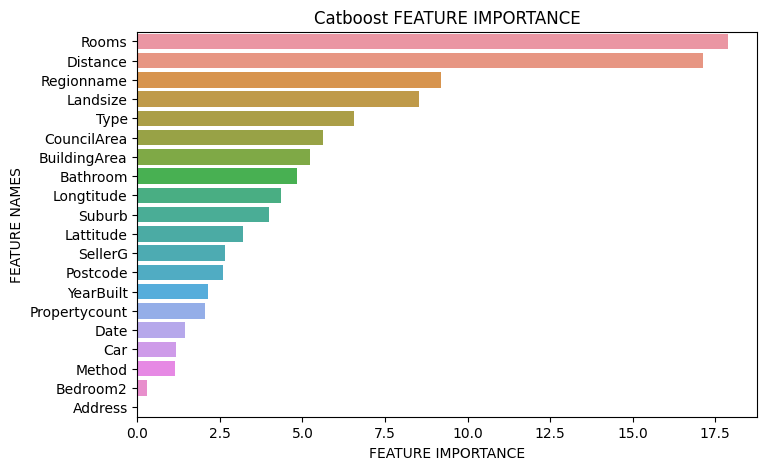

In [43]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

def plot_feature_importance(importance, names, model_type):
    
    # Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    # Create a DataFrame using a Dictionary
    data = {'feature_names': feature_names,'feature_importance': feature_importance}
    fi_df = pd.DataFrame(data)
    
    # Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)
    
    # Define size of bar plot
    plt.figure(figsize=(8, 5))

    # Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])

    # Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    
plot_feature_importance(catboost_2.feature_importances_, X_train_cb.columns, 'Catboost ')

In [44]:
# Убираем последние 5 колонок

df_for_catboost.drop(['Address', 'Bedroom2', 'Method', 'Car', 'Date'], axis=1, inplace=True)

In [45]:
# Заполняем пропуски в колонках Lattitude и Longtitude

for sub in df_for_catboost['Suburb'].unique():
    df_for_catboost['Lattitude'][df_for_catboost.Suburb == sub] = df_for_catboost['Lattitude'][df_for_catboost.Suburb == sub].fillna(df_for_catboost.groupby(['Suburb'])['Lattitude'].agg('mean')[sub])

for sub in df_for_catboost['Suburb'].unique():
    df_for_catboost['Longtitude'][df_for_catboost.Suburb == sub] = df_for_catboost['Longtitude'][df_for_catboost.Suburb == sub].fillna(df_for_catboost.groupby(['Suburb'])['Longtitude'].agg('mean')[sub])

df_for_catboost['Lattitude'].fillna(df_for_catboost['Lattitude'].mean(), inplace=True)
df_for_catboost['Longtitude'].fillna(df_for_catboost['Longtitude'].mean(), inplace=True)

In [46]:
# Заново разбиваем данные

from sklearn.model_selection import train_test_split

train_cb, test_cb = train_test_split(df_for_catboost, train_size=0.8, shuffle=True, random_state=42)

X_train_cb = train_cb.drop('Price', axis=1)
X_test_cb = test_cb.drop('Price', axis=1)

y_train_cb = train_cb['Price']
y_test_cb = test_cb['Price']

Обучим модель на всех данных и сделаем предикт.

In [47]:
from catboost import CatBoostRegressor

cat_features = ['Suburb', 'Type', 'SellerG', 'CouncilArea', 'Regionname'] # Список категориальных колонок

catboost_3 = CatBoostRegressor(iterations=1000,
                                verbose=100,
                                depth=12,
                                learning_rate=0.1,
                                task_type='GPU',
                                cat_features=cat_features,
                                random_state=42)

catboost_3.fit(df_for_catboost.drop(['Price'], axis=1), df_for_catboost['Price'])

0:	learn: 580892.1837980	total: 1.02s	remaining: 17m 2s
100:	learn: 253248.5814962	total: 1m 22s	remaining: 12m 17s
200:	learn: 231565.6075524	total: 2m 36s	remaining: 10m 22s
300:	learn: 225332.0827311	total: 3m 31s	remaining: 8m 11s
400:	learn: 223011.6165803	total: 4m 9s	remaining: 6m 13s
500:	learn: 221140.2235509	total: 4m 51s	remaining: 4m 50s
600:	learn: 217269.4122564	total: 5m 50s	remaining: 3m 52s
700:	learn: 214829.5169196	total: 6m 36s	remaining: 2m 48s
800:	learn: 212403.3929542	total: 7m 29s	remaining: 1m 51s
900:	learn: 211165.6777838	total: 8m 4s	remaining: 53.2s
999:	learn: 208836.6174567	total: 9m 2s	remaining: 0us


### Предикт для отправки на Kaggle

In [48]:
test_df_for_catboost = pd.read_csv('test.csv')

In [49]:
test_df_for_catboost.drop(['Address', 'Bedroom2', 'Method', 'Car', 'Date'], axis=1, inplace=True)

In [50]:
test_df_for_catboost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8818 entries, 0 to 8817
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         8818 non-null   object 
 1   Rooms          8818 non-null   int64  
 2   Type           8818 non-null   object 
 3   SellerG        8818 non-null   object 
 4   Distance       8817 non-null   float64
 5   Postcode       8817 non-null   float64
 6   Bathroom       5854 non-null   float64
 7   Landsize       4365 non-null   float64
 8   BuildingArea   2882 non-null   float64
 9   YearBuilt      3112 non-null   float64
 10  CouncilArea    8816 non-null   object 
 11  Lattitude      5908 non-null   float64
 12  Longtitude     5908 non-null   float64
 13  Regionname     8816 non-null   object 
 14  Propertycount  8816 non-null   float64
 15  id             8818 non-null   int64  
dtypes: float64(9), int64(2), object(5)
memory usage: 1.1+ MB


In [51]:
# Смотрим на пропуски в категориальных колонках

test_df_for_catboost[test_df_for_catboost['CouncilArea'].isna()]

,Suburb,Rooms,Type,SellerG,Distance,Postcode,Bathroom,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,id
2634,Camberwell,2,h,Jellis,7.7,3124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15921
4628,Fawkner Lot,3,h,Brad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33262


In [52]:
# Узнаём округ и регион для района Camberwell

test_df_for_catboost[test_df_for_catboost['Suburb'] == 'Camberwell'].head()

,Suburb,Rooms,Type,SellerG,Distance,Postcode,Bathroom,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,id
62,Camberwell,3,u,Noel,7.7,3124.0,NaN,NaN,NaN,NaN,Boroondara City Council,NaN,NaN,Southern Metropolitan,8920.0,14406
63,Camberwell,5,h,Buxton,7.7,3124.0,3.0,600.0,291.0,1935.0,Boroondara City Council,-37.84265,145.08199,Southern Metropolitan,8920.0,15872
64,Camberwell,2,u,Noel,7.7,3124.0,NaN,NaN,NaN,NaN,Boroondara City Council,NaN,NaN,Southern Metropolitan,8920.0,26557
65,Camberwell,4,h,Fletchers,7.7,3124.0,3.0,588.0,189.0,1925.0,Boroondara City Council,-37.83411,145.06916,Southern Metropolitan,8920.0,27635
582,Camberwell,2,u,Jellis,7.7,3124.0,NaN,NaN,NaN,NaN,Boroondara City Council,NaN,NaN,Southern Metropolitan,8920.0,11167


In [53]:
# Узнаём округ и регион для района Fawkner Lot

test_df_for_catboost[test_df_for_catboost['Suburb'] == 'Fawkner Lot'].head()

,Suburb,Rooms,Type,SellerG,Distance,Postcode,Bathroom,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,id
4628,Fawkner Lot,3,h,Brad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33262


In [54]:
# Проверяем в тренировочном датафрейме

df[df['Suburb'] == 'Fawkner Lot'].head()

,Suburb,Rooms,Price,SellerG,Distance,Postcode,Bathroom,Car,Landsize,YearBuilt,CouncilArea,Lattitude,Longtitude,Propertycount,month,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,Type_t,Type_u,Method_S,Method_SA,Method_SP,Method_VB
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,


Информации по району Fawkner Lot нет, заполним значением 'no_info'

In [55]:
test_df_for_catboost['CouncilArea'][test_df_for_catboost.Suburb == 'Camberwell'].fillna(value = 'Boroondara City Council', inplace=True)
test_df_for_catboost['Regionname'][test_df_for_catboost.Suburb == 'Camberwell'].fillna(value = 'Southern Metropolitan', inplace=True)

test_df_for_catboost['CouncilArea'].fillna(value = 'no_info', inplace=True)
test_df_for_catboost['Regionname'].fillna(value = 'no_info', inplace=True)

In [56]:
# Заполнение пропусков в колонках Lattitude и Longtitude

for sub in test_df_for_catboost['Suburb'].unique():
    test_df_for_catboost['Lattitude'][test_df_for_catboost.Suburb == sub] = test_df_for_catboost['Lattitude'][test_df_for_catboost.Suburb == sub].fillna(test_df_for_catboost.groupby(['Suburb'])['Lattitude'].agg('mean')[sub])

for sub in test_df_for_catboost['Suburb'].unique():
    test_df_for_catboost['Longtitude'][test_df_for_catboost.Suburb == sub] = test_df_for_catboost['Longtitude'][test_df_for_catboost.Suburb == sub].fillna(test_df_for_catboost.groupby(['Suburb'])['Longtitude'].agg('mean')[sub])

test_df_for_catboost['Lattitude'].fillna(test_df_for_catboost['Lattitude'].mean(), inplace=True)
test_df_for_catboost['Longtitude'].fillna(test_df_for_catboost['Longtitude'].mean(), inplace=True)

In [61]:
# Делаем предикт

test_df_for_catboost = test_df_for_catboost.set_index('id')
test_df_for_catboost['Price'] = catboost_3.predict(test_df_for_catboost)
test_df_for_catboost = test_df_for_catboost.reset_index()
prediction = test_df_for_catboost[['id', 'Price']]
prediction.to_csv('prediction.csv', index=False)

In [62]:
prediction

,id,Price
0,30130,9.867397e+05
1,18311,1.294382e+06
2,18934,1.193574e+06
3,1824,7.487316e+05
4,31339,8.050690e+05
...,...,...
8813,11120,1.286019e+06
8814,3950,7.734772e+05
8815,2209,6.840606e+05
8816,23872,9.965881e+05


Удалось занять 23-е место

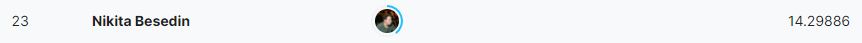